In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('Datasets/train.csv')
df.head(10)
df.shape

(891, 12)

In [3]:
df.shape

(891, 12)

# Data Visualization and Pre-Processing

In [4]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
!conda install -c anaconda seaborn -y

Let's see how many of each class in our dataset

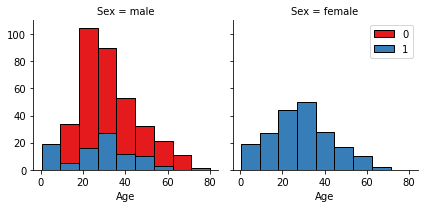

In [5]:
import seaborn as sns
bins = np.linspace(df.Age.min(), df.Age.max(), 10)
g = sns.FacetGrid(df, col="Sex", hue="Survived", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [6]:
df.groupby(['Sex'])['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

Converting Categories into numerical values

In [7]:
df['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


Removing unnecessary data to save memory

In [8]:
df_new = df[['Sex','Age']]
df_new = df_new.dropna()
df_new

,Sex,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
...,...,...
885,1,39.0
886,0,27.0
887,1,19.0
889,0,26.0


In [9]:
X = df_new
X[0:5]

,Sex,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


Our Labels

In [10]:
df_new1 = df[['Survived', 'Age']]
df_new1 = df_new1[df_new1['Age'].notna()]
df_new1.drop(['Age'], axis=1, inplace=True)
y = np.asarray(df_new1['Survived'])
y[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

# Normalizing Data

In [11]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.75905134, -0.53037664],
       [ 1.31743394,  0.57183099],
       [ 1.31743394, -0.25482473],
       [ 1.31743394,  0.36516706],
       [-0.75905134,  0.36516706]])

Splitting the train model into training and testing dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (535, 2) (535,)
Test set: (179, 2) (179,)


In [13]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [14]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [15]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.66121513, 0.33878487],
       [0.33278145, 0.66721855],
       [0.65462141, 0.34537859],
       [0.65990128, 0.34009872],
       [0.34195044, 0.65804956],
       [0.61248457, 0.38751543],
       [0.36334833, 0.63665167],
       [0.36878743, 0.63121257],
       [0.63855562, 0.36144438],
       [0.66774685, 0.33225315],
       [0.65196701, 0.34803299],
       [0.38530121, 0.61469879],
       [0.70309524, 0.29690476],
       [0.34990501, 0.65009499],
       [0.34724393, 0.65275607],
       [0.64260289, 0.35739711],
       [0.65196701, 0.34803299],
       [0.69071944, 0.30928056],
       [0.68946628, 0.31053372],
       [0.66121513, 0.33878487],
       [0.66448886, 0.33551114],
       [0.6625265 , 0.3374735 ],
       [0.34857329, 0.65142671],
       [0.64930314, 0.35069686],
       [0.35794396, 0.64205604],
       [0.34591695, 0.65408305],
       [0.40349293, 0.59650707],
       [0.33669603, 0.66330397],
       [0.64394751, 0.35605249],
       [0.63990693, 0.36009307],
       [0.

# Jaccard Index

In [16]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7692307692307693

# Confusion Matrix

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 49  14]
 [ 16 100]]


Confusion matrix, without normalization
[[ 49  14]
 [ 16 100]]


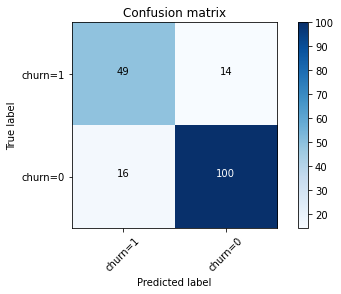

In [18]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [19]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.88      0.86      0.87       116
           1       0.75      0.78      0.77        63

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [20]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.537059760071728

# Model Evaluation using Test set

In [21]:
test_df = pd.read_csv('Datasets/test.csv')
test_df = test_df[test_df['Age'].notna()]
test_df = test_df[test_df['Sex'].notna()]
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
test_df['Survived']=''

In [23]:
test_df['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [24]:
feature_test = test_df[['Sex', 'Age']]
X = np.asarray(feature_test)
X[0:5]

array([[ 0. , 34.5],
       [ 1. , 47. ],
       [ 0. , 62. ],
       [ 0. , 27. ],
       [ 1. , 22. ]])

In [25]:
X_test1= preprocessing.StandardScaler().fit(X).transform(X)

In [26]:
y_hat_lr = LR.predict(X_test1)
test_df['Survived']=y_hat_lr
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,3,"Peacock, Miss. Treasteall",1,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,1
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",1,37.0,1,0,19928,90.0000,C78,Q,1
412,1304,3,"Henriksson, Miss. Jenny Lovisa",1,28.0,0,0,347086,7.7750,NaN,S,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,1
